In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats("svg")

In [34]:
data_path = "/Users/Khachatur/anaconda_projects/lesson4.2/names/"

In [35]:
def years_diapason(begin_date, finish_date, step):
    dataset = dict()
    for year in range(begin_date, finish_date, step):
        dataset[year] = pd.read_csv(''.join([data_path, 'yob', str(year), '.txt']), 
                                         names=['Name','Gender','Quantity'])
    result = pd.concat(dataset, names=['Year', 'Position'])
    
    return result


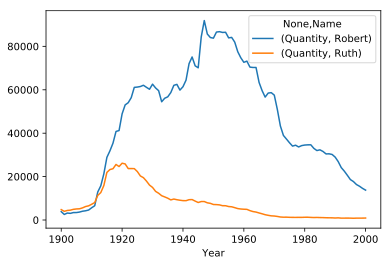

In [36]:
# Part1
data = years_diapason(1900, 2001, 1)
data = data.groupby([data.index.get_level_values(0), 'Name']).sum()
data.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

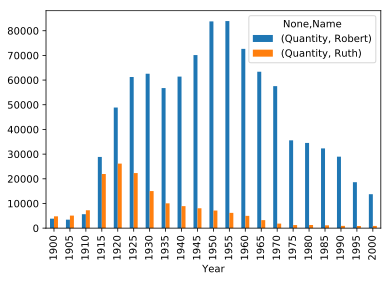

In [37]:
# Part2
data = years_diapason(1900, 2001, 5)
data = data. groupby([data.index.get_level_values(0), 'Name']).sum()
data.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

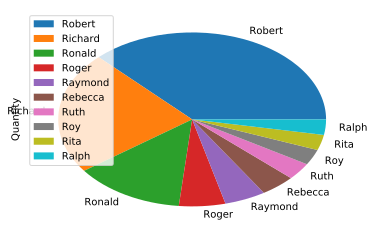

In [40]:
# Part3
top = pd.read_csv(''.join([data_path, 'yob1950.txt']),
                       names=['Name','Gender','Quantity'])
top = top[top.Name.str.startswith('R')]
top = top.groupby('Name').sum().sort_values(by='Quantity', ascending=False).head(10)
top.plot.pie(y='Quantity')

In [51]:
def consonants(word):
    result = 0
    for letter in word.lower():
        if letter == 'a' or letter == 'e' or letter == 'i' or letter =='o' or letter =='u' not in word:
            result += 1
    return result

In [61]:
def diapason_name(begin_date, finish_date, step):
    result = pd.read_csv(''.join([data_path, 'yob', str(begin_date), '.txt']), 
                                         names=['Name','Gender','Quantity'])
    for year in range(begin_date + 1, finish_date, step):
        data = pd.read_csv(''.join([data_path, 'yob', str(year), '.txt']), 
                                         names=['Name','Gender','Quantity'])
        result = pd.concat([result, data])
    
    return result

In [62]:
data = diapason_name(1900, 2001, 1)
data = data. groupby('Name').sum()
data['Name'] = data.index.get_level_values(0)
data['Consonants'] = data.Name.apply(consonants)
data.plot.scatter(y='Quantity', x='Consonants')